In [1]:
%matplotlib inline

In [2]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [3]:
import pandas as pd
import csv

state_pop = {}
with open('pop.csv') as f:
    
    lines = f.readlines()
    
    for i in range(6,len(lines)):
        line = lines[i].strip().split(",")
        s = us_state_abbrev[line[4]]
        state_pop[s] = int(line[15])
        
len(state_pop)    
    

52

In [4]:
hos = {}

df = pd.read_csv('h.csv')

for s in list(df["State"]):
    if s not in hos:
        hos[s] = 1
    else:
        hos[s]+=1
len(hos)

56

In [5]:
fin = {}
for k,v in state_pop.items():

    fin[k] = v//hos[k]
fin = sorted(fin.items(), key=lambda d: d[1], reverse=False)
fin = dict(fin)
fin

{'SD': 15149,
 'ND': 16129,
 'MT': 16572,
 'WY': 19917,
 'KS': 20945,
 'NE': 21160,
 'IA': 26683,
 'AK': 28274,
 'MS': 29225,
 'OK': 30309,
 'LA': 30655,
 'WV': 34043,
 'AR': 34996,
 'ME': 37196,
 'ID': 38900,
 'VT': 39022,
 'MN': 40624,
 'WI': 42701,
 'KY': 43736,
 'NM': 45494,
 'IN': 45547,
 'NH': 48338,
 'MO': 49769,
 'AL': 50388,
 'PR': 56023,
 'HI': 56823,
 'TN': 57386,
 'OH': 60499,
 'UT': 60645,
 'CO': 62541,
 'TX': 62644,
 'IL': 65582,
 'NV': 67274,
 'PA': 67373,
 'OR': 67449,
 'MI': 69333,
 'GA': 71504,
 'WA': 74493,
 'SC': 75882,
 'AZ': 76149,
 'DC': 77949,
 'DE': 80456,
 'NC': 86513,
 'RI': 88190,
 'MA': 88238,
 'VA': 89487,
 'CT': 96527,
 'NY': 100671,
 'FL': 100683,
 'CA': 103032,
 'MD': 107782,
 'NJ': 111075}

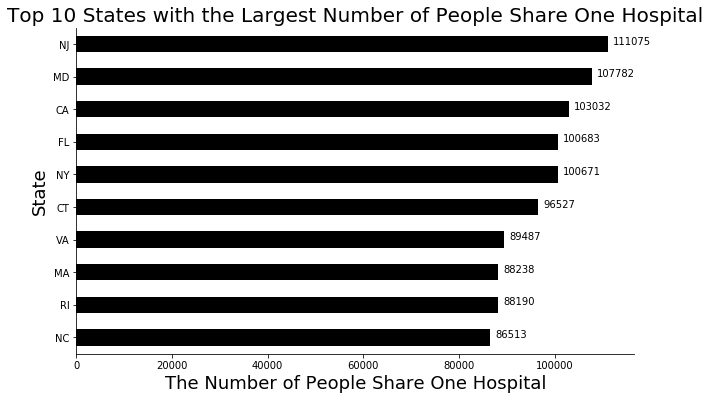

In [11]:
import matplotlib.pyplot as plt

new_dic = {"s":[],"v":[]}
for k,v in fin.items():
    new_dic["s"].append(k)
    new_dic["v"].append(v)
    
df = pd.DataFrame(new_dic, index = fin.keys())

fig,ax = plt.subplots(figsize = (10,6))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Top 10 States with the Largest Number of People Share One Hospital",size=20)
ax.set_ylabel("State",size=18)
ax.set_xlabel("The Number of People Share One Hospital",size=18)

df[-10:].plot.barh(ax = ax, legend = False,color="black")

new_df = df[-10:]
new_df = new_df.reset_index()

new_df

for i in range(len(new_df)):
    ax.text(new_df.loc[i,"v"]+1000,i,str(new_df.loc[i,"v"]))





In [12]:
td = list(fin.keys())[:5]
td2 = list(fin.keys())[-5:] 

In [13]:
ax.get_figure().savefig("fig3.svg", bbox_inches="tight")

In [51]:
# dd = {}
# dd2 = {}
# name1 = "111/"
# name2 = ".csv"

# for n in td:
#     once = False
#     name = name1 + n + name2
#     with open(name) as f:
#         lines = f.readlines()
#         lis = []
#         for line in lines:
#             line = line.strip().split(",")
#             if once:
#                 if line[5] != "3":
#                     break
#             if line[5] == "3":
#                 once = True
#                 lis.append(float(line[11]))
#         dd[n] = lis

# for n in td2:
#     once = False
#     name = name1 + n + name2
#     with open(name) as f:
#         lines = f.readlines()
#         lis = []
#         for line in lines:
#             line = line.strip().split(",")
#             if once:
#                 if line[5] != "3":
#                     break
#             if line[5] == "3":
#                 once = True
#                 lis.append(float(line[11]))
#         dd2[n] = lis

In [52]:
import numpy as np
df1 = pd.DataFrame(dd,index = np.arange(1980,2015,1))
df2 = pd.DataFrame(dd2,index = np.arange(1980,2015,1))

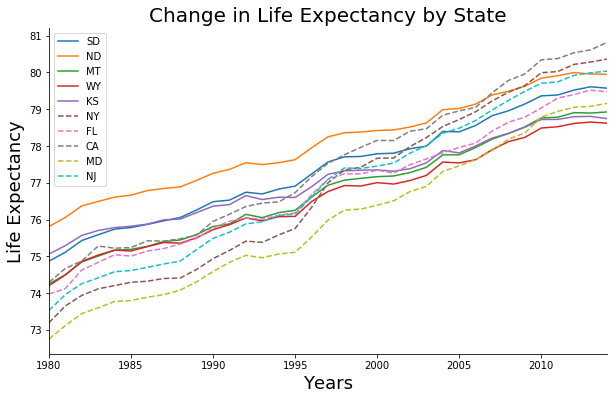

In [54]:
# fig,ax = plt.subplots(figsize = (10,6))
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# ax.set_title("Change in Life Expectancy by State",size=20)
# ax.set_xlabel("Years",size=18)
# ax.set_ylabel("Life Expectancy",size=18)
# # df1.plot(linestyle="--")

# df1.plot(ax = ax,linestyle="-")
# df2.plot(ax = ax,linestyle="--")

In [22]:
import os

path = "/Users/wangkoukou/Desktop/cs320 final/111" # your path
files= os.listdir(path)

ddd = {}
name1 = "111/" # your filename

for file in files:
    
    once = False
    if file.endswith(".CSV"):  
        
        name = file[:-4].replace("_", " ")
        ll = name.split()
        
        for i in range(len(ll)):
            ll[i] = ll[i][0] + ll[i][1:].lower()
            
        name = " ".join(ll)
        if name in us_state_abbrev.keys():
            name = us_state_abbrev[name]
            


        with open(name1+file) as f:
            lines = f.readlines()
            lis = []
            for line in lines:
                line = line.strip().split(",")
                if once:
                    if line[5] != "3":
                        break
                if line[5] == "3":
                    once = True
                    lis.append(float(line[11]))
            ddd[name] = lis
        
ddd

{'GA': [71.97451128,
  72.25992218,
  72.71497642,
  72.81908496,
  72.99761874,
  73.0153053,
  73.10858689,
  73.26048245,
  73.28746436,
  73.44048276,
  73.74026059,
  73.8624536,
  74.14640299,
  74.05211429,
  74.2031635,
  74.28212116,
  74.66381192,
  75.0739679,
  75.22955923,
  75.30845735,
  75.31995939,
  75.34388918,
  75.479351,
  75.62680832,
  75.93171142,
  76.05447923,
  76.18548369,
  76.46924182,
  76.63340765,
  76.83037251,
  77.08257887,
  77.22469548,
  77.37199843,
  77.38451109,
  77.38193299],
 'WI': [75.16478885,
  75.44947003,
  75.76628916,
  75.89004927,
  76.01562233,
  76.09443839,
  76.10422721,
  76.23170422,
  76.29982856,
  76.51617122,
  76.69662832,
  76.80085651,
  77.11241428,
  77.02009127,
  77.10911428,
  77.18195238,
  77.48717109,
  77.83595569,
  77.94014158,
  77.95963186,
  78.0137274,
  78.06763766,
  78.18030898,
  78.41759805,
  78.67013898,
  78.70121097,
  78.89517792,
  79.11852586,
  79.30732411,
  79.49001851,
  79.63531473,
  79